In [1]:
import os
print(f"Current working directory: {os.path.abspath(os.curdir)}")

Current working directory: /scratch/ak8725/ipynb scripts and plots


In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.3.8'

# Conserved TADs example 1

In [4]:
tads = '/scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed'
oruf_tads = '/scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed'
ir64_tads = '/scratch/ak8725/IR64_new/TADs_boundaries/IR64_TADs_5kb_two_tools_80.bed'
npb_genes = f"/scratch/ak8725/annotations/npb_genes6.bed"
oruf_genes = f"/scratch/ak8725/annotations/oruf_genes6.bed"
ir64_genes = f"/scratch/ak8725/annotations/ir64_genes6.bed"
npb_te = f"/scratch/ak8725/SV-TIPs_from_Raúl_Castanera/TE_annotation/npb_TEs.bed"
oruf_te = f"/scratch/ak8725/SV-TIPs_from_Raúl_Castanera/TE_annotation/oruf_TEs.bed"

hicexp_tads = '/scratch/ak8725/NPB_new/TADs_boundaries/NPB_new_5kb_hicex_domains.bed'
ir64_hicexp_tads = '/scratch/ak8725/IR64_new/TADs_boundaries/IR64_new_5kb_hicex_domains.bed'

In [73]:
#find genes within the plotted region that are orthologous to oruf
#all genes within that region -> Gramene orthologs search -> /dotplots/example1_genes.txt
# Initialize variables
nipponbare_genes = []
oruf_genes = []

# Open the file
with open('../dotplots/example1_genes.txt', 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Split the line by tab character
        columns = line.strip().split('\t')
        
        # Check if both the first and second columns have entries
        if len(columns) >= 2 and columns[0] and columns[1]:
            nipponbare_genes.append(f"'{columns[0]}'")
            oruf_genes.append(f"'{columns[1]}'")

# Print the number of orthologous genes and the lists of orthologous genes
print("Number of orthologous genes:", len(nipponbare_genes))
print("List of orthologous Nipponbare genes:", ", ".join(nipponbare_genes))
print("List of orthologous Oruf genes:", ", ".join(oruf_genes))

Number of orthologous genes: 46
List of orthologous Nipponbare genes: 'Os01g0146200', 'Os01g0146801', 'Os01g0147001', 'Os01g0147200', 'Os01g0147300', 'Os01g0147400', 'Os01g0147700', 'Os01g0147800', 'Os01g0147900', 'Os01g0148000', 'Os01g0148050', 'Os01g0148100', 'Os01g0148400', 'Os01g0148500', 'Os01g0148700', 'Os01g0149350', 'Os01g0149700', 'Os01g0149800', 'Os01g0149900', 'Os01g0150000', 'Os01g0150100', 'Os01g0150200', 'Os01g0150200', 'Os01g0150400', 'Os01g0150800', 'Os01g0150950', 'Os01g0151100', 'Os01g0151200', 'Os01g0151500', 'Os01g0151600', 'Os01g0151700', 'Os01g0151900', 'Os01g0152000', 'Os01g0152100', 'Os01g0152200', 'Os01g0152300', 'Os01g0152600', 'Os01g0152800', 'Os01g0152900', 'Os01g0152950', 'Os01g0153000', 'Os01g0153250', 'Os01g0153400', 'Os01g0153500', 'Os01g0153600', 'Os01g0153800'
List of orthologous Oruf genes: 'ORUFI01G02970', 'ORUFI01G03020', 'ORUFI01G03050', 'ORUFI01G03070', 'ORUFI01G03080', 'ORUFI01G03090', 'ORUFI01G03130', 'ORUFI01G03140', 'ORUFI01G03150', 'ORUFI01G0

In [74]:
#create a bed file with orthologous genes colored green, the rest yellow NPB
# List of genes with different color
green_genes = ['Os01g0146200', 'Os01g0146801', 'Os01g0147001', 'Os01g0147200', 'Os01g0147300', 'Os01g0147400', 'Os01g0147700', 'Os01g0147800', 'Os01g0147900', 'Os01g0148000', 'Os01g0148050', 'Os01g0148100', 'Os01g0148400', 'Os01g0148500', 'Os01g0148700', 'Os01g0149350', 'Os01g0149700', 'Os01g0149800', 'Os01g0149900', 'Os01g0150000', 'Os01g0150100', 'Os01g0150200', 'Os01g0150200', 'Os01g0150400', 'Os01g0150800', 'Os01g0150950', 'Os01g0151100', 'Os01g0151200', 'Os01g0151500', 'Os01g0151600', 'Os01g0151700', 'Os01g0151900', 'Os01g0152000', 'Os01g0152100', 'Os01g0152200', 'Os01g0152300', 'Os01g0152600', 'Os01g0152800', 'Os01g0152900', 'Os01g0152950', 'Os01g0153000', 'Os01g0153250', 'Os01g0153400', 'Os01g0153500', 'Os01g0153600', 'Os01g0153800']

# Open input and output files
with open("/scratch/ak8725/annotations/npb_genes6.bed", "r") as infile, open("/scratch/ak8725/annotations/npb_genes9.bed", "w") as outfile:
    # Process each line in the input file
    for line in infile:
        parts = line.strip().split("\t")
        gene_id = parts[3]
        
        # Set color based on gene_id
        if gene_id in green_genes:
            color = "0,255,0"  # Green color
        else:
            color = "255,255,0"  # Yellow color
        
        # Create the new line with additional columns
        new_line = "\t".join(parts[:6]) + f"\t0\t0\t{color}\n"
        
        # Write the new line to the output file
        outfile.write(new_line)

In [77]:
#create a bed file with orthologous genes colored green, the rest yellow ORUF
# List of genes with different color
green_genes = ['ORUFI01G02970', 'ORUFI01G03020', 'ORUFI01G03050', 'ORUFI01G03070', 'ORUFI01G03080', 'ORUFI01G03090', 'ORUFI01G03130', 'ORUFI01G03140', 'ORUFI01G03150', 'ORUFI01G03160', 'ORUFI01G03160', 'ORUFI01G03170', 'ORUFI01G03180', 'ORUFI01G03190', 'ORUFI01G03210', 'ORUFI01G03250', 'ORUFI01G03280', 'ORUFI01G03290', 'ORUFI01G03300', 'ORUFI01G03320', 'ORUFI01G03330', 'ORUFI01G03340', 'ORUFI04G06700', 'ORUFI01G03350', 'ORUFI01G03360', 'ORUFI06G21910', 'ORUFI01G03390', 'ORUFI01G03400', 'ORUFI01G03420', 'ORUFI01G03430', 'ORUFI01G03440', 'ORUFI01G03460', 'ORUFI01G03470', 'ORUFI01G03480', 'ORUFI01G03490', 'ORUFI01G03500', 'ORUFI01G03510', 'ORUFI01G03530', 'ORUFI01G03540', 'ORUFI01G03550', 'ORUFI01G03570', 'ORUFI01G03590', 'ORUFI01G03610', 'ORUFI01G03620', 'ORUFI01G03630', 'ORUFI01G03640']
    
# Open input and output files
with open("/scratch/ak8725/annotations/oruf_genes6.bed", "r") as infile, open("/scratch/ak8725/annotations/oruf_genes9.bed", "w") as outfile:
    # Process each line in the input file
    for line in infile:
        parts = line.strip().split("\t")
        gene_id = parts[3]
        
        # Set color based on gene_id
        if gene_id in green_genes:
            color = "0,255,0"  # Green color
        else:
            color = "255,255,0"  # Yellow color
        
        # Create the new line with additional columns
        new_line = "\t".join(parts[:6]) + f"\t0\t0\t{color}\n"
        
        # Write the new line to the output file
        outfile.write(new_line)

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes9.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes9.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


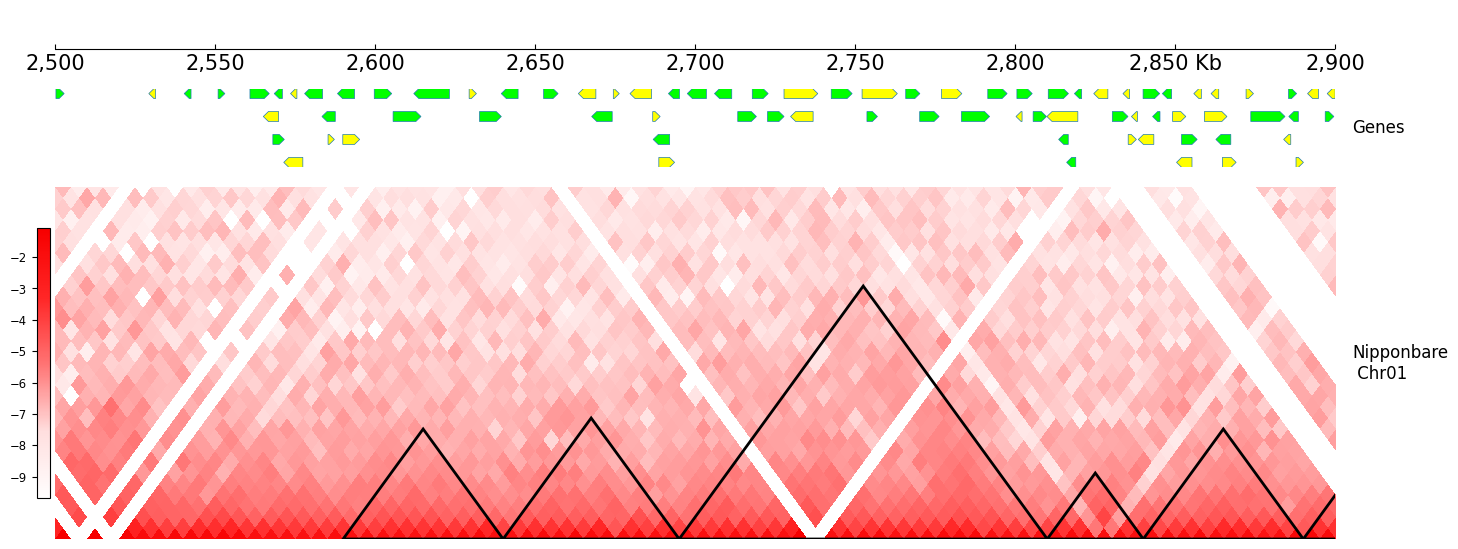

In [13]:
#nipponbare conserved TAD chr01:2590000-2640000
frame = XAxis() + \
        BED(f"/scratch/ak8725/annotations/npb_genes9.bed", labels=False) + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr01')
        
fig = frame.plot("chr01:2500000-2900000")
fig.savefig(fname= "/scratch/ak8725/figs/fig8C-1.pdf")
frame.plot("chr01:2500000-2900000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes9.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/dotplotsREGIONS/1_ins.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/dotplotsREGIONS/1_del.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/dotplotsREGIONS/1_dup.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes9.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/dotplotsREGIONS/1_ins.bed.bgz.tbi
[W::hts_idx_load3] The index file 

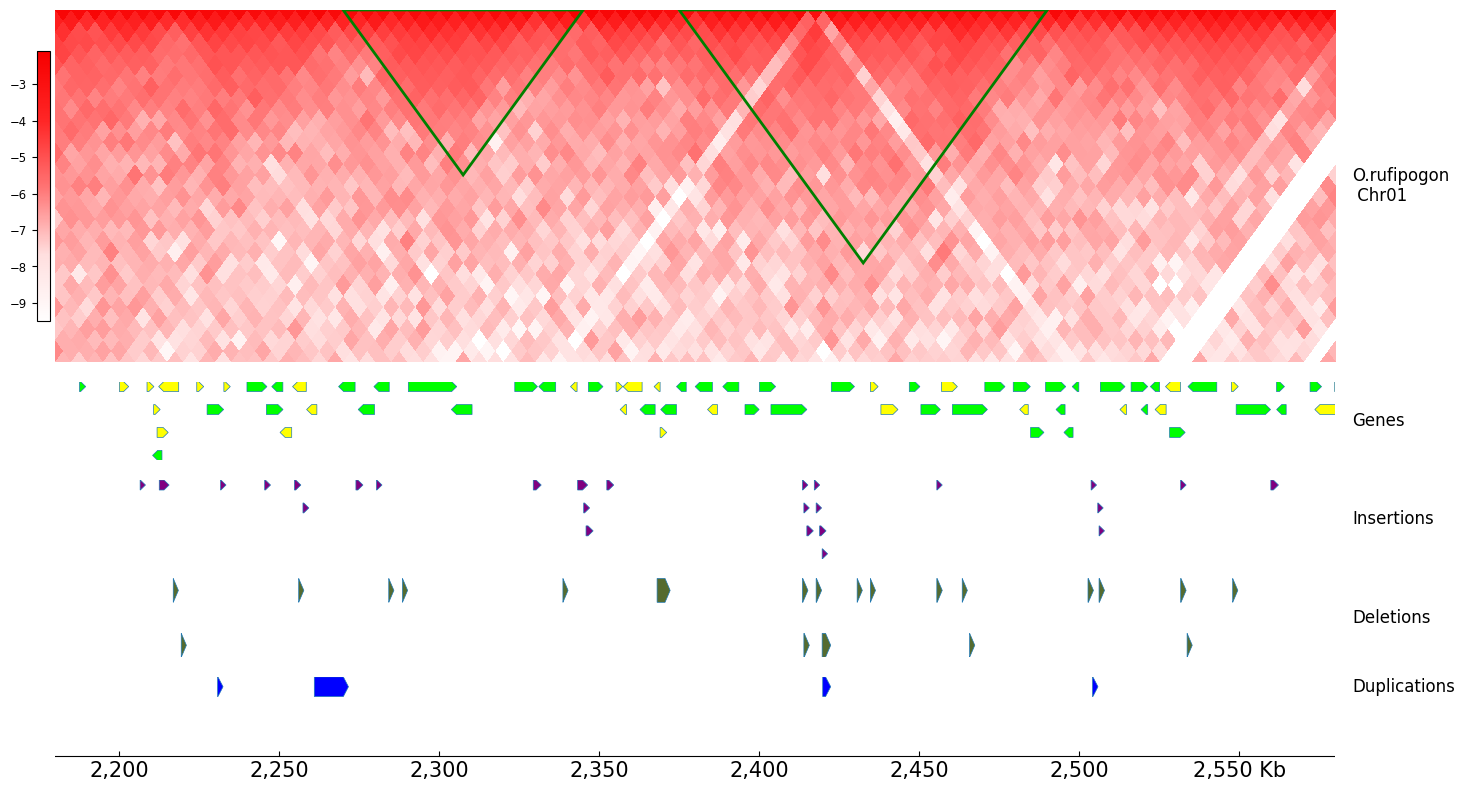

In [14]:
#oruf conserved tad chr01:2270000-2345000
frame = HiCMat(f"/scratch/ak8725/oruf_mrg/ruf_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(oruf_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('O.rufipogon\n Chr01') + \
        Spacer(0.5) + \
        BED(f"/scratch/ak8725/annotations/oruf_genes9.bed") + Title("Genes") + \
        Spacer(0.5) + \
        BED(f"/scratch/ak8725/dotplotsREGIONS/1_ins.bed", labels=True, color = "purple") + Title("Insertions") + \
        Spacer(0.5) + \
        BED(f"/scratch/ak8725/dotplotsREGIONS/1_del.bed", labels=True, color = "darkolivegreen") + Title("Deletions") + \
        Spacer(0.5) + \
        BED(f"/scratch/ak8725/dotplotsREGIONS/1_dup.bed", labels=True, color = "blue", height=0.5) + Title("Duplications") + \
        Spacer(0.5) + \
        XAxis()

fig = frame.plot("chr01:2180000-2580000")
fig.savefig(fname= "/scratch/ak8725/figs/fig8C-2.pdf")
frame.plot("chr01:2180000-2580000")

# Conserved TADs example 2 BAD EXAMPLE

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


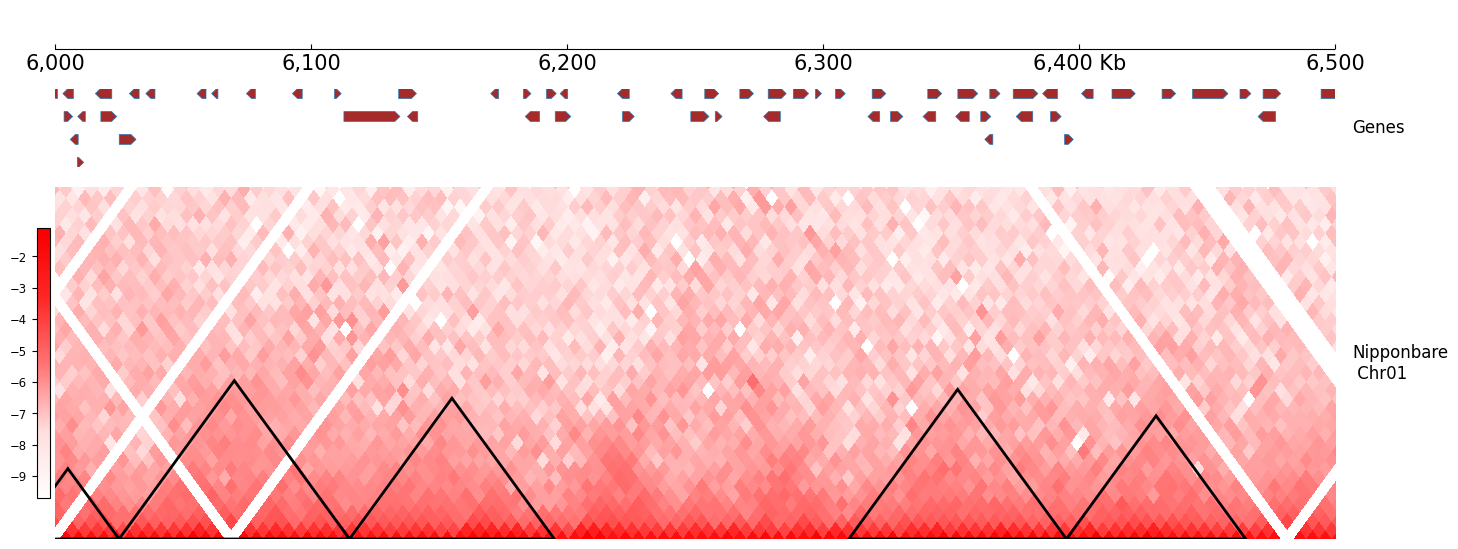

In [5]:
#nipponbare conserved TAD chr01:6395000-6465000 108%
#nipponbare conserved TAD chr01:6115000-6195000 10%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr01')
        
frame.plot("chr01:6000000-6500000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes6.bed.bgz.tbi


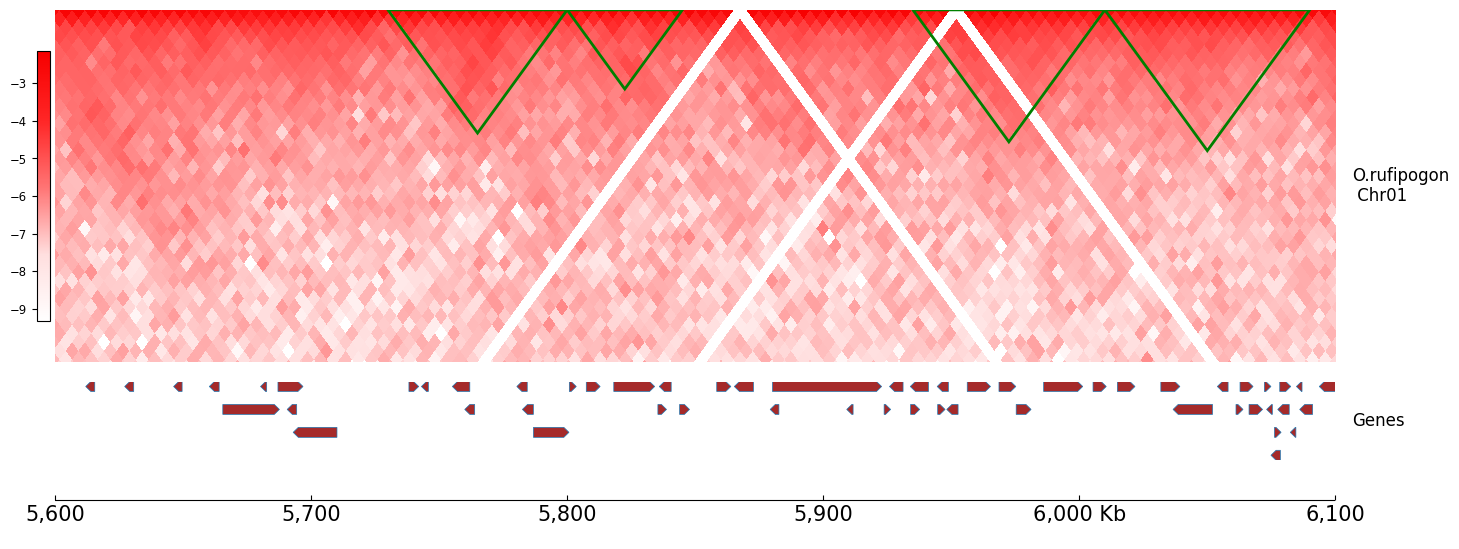

In [6]:
#oruf conserved tad chr01:5935000-6010000
#oruf conserved tad chr01:5730000-5800000
frame = HiCMat(f"/scratch/ak8725/oruf_mrg/ruf_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(oruf_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('O.rufipogon\n Chr01') + \
        Spacer(0.5) + \
        BED(oruf_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr01:5600000-6100000")

# Conserved TADs example 3

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


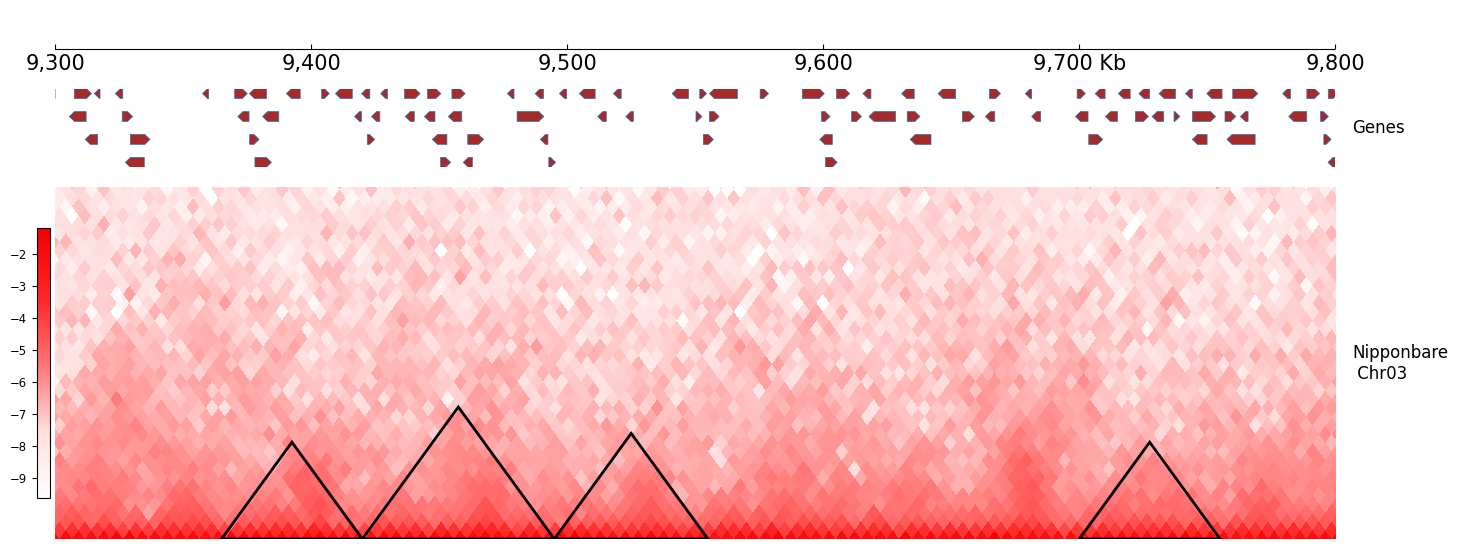

In [32]:
#nipponbare conserved TAD chr03:9495000-9555000 95%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr03')
        
frame.plot("chr03:9300000-9800000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes6.bed.bgz.tbi


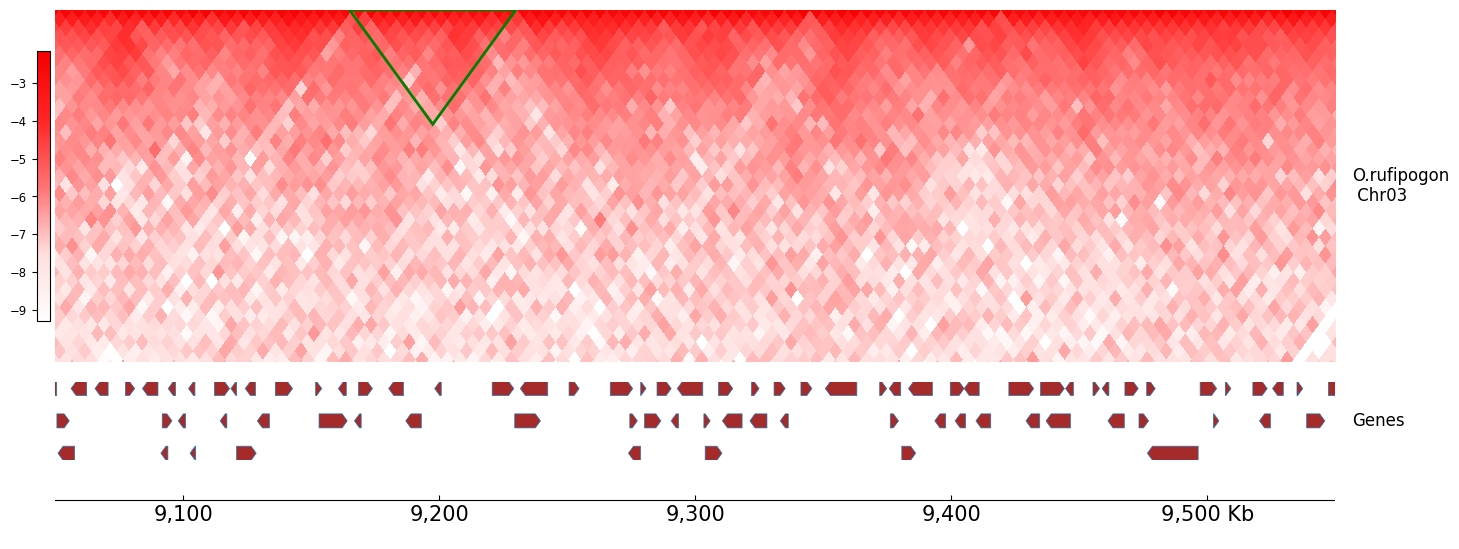

In [33]:
#oruf conserved tad chr03:9165000-9230000
frame = HiCMat(f"/scratch/ak8725/oruf_mrg/ruf_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(oruf_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('O.rufipogon\n Chr03') + \
        Spacer(0.5) + \
        BED(oruf_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr03:9050000-9550000")

# Conserved TADs example 4

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


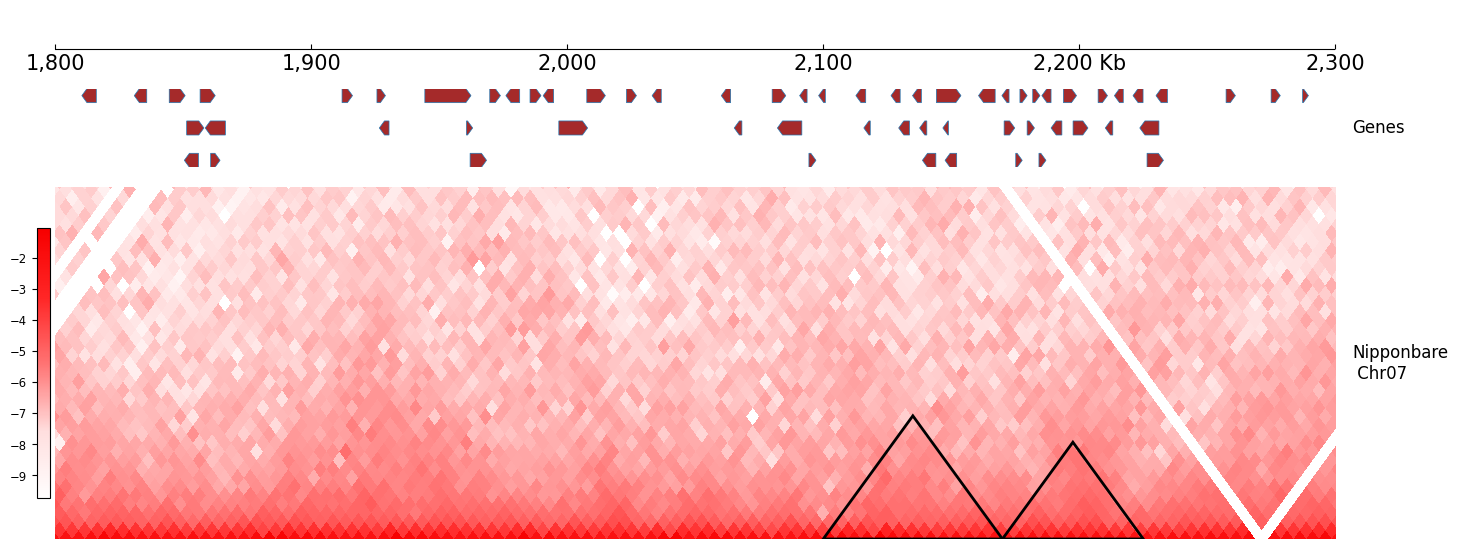

In [75]:
#nipponbare conserved TAD chr07:2100000-2170000, chr07:2170000-2225000 107,116%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr07')
        
frame.plot("chr07:1800000-2300000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/IR64_new/TADs_boundaries/IR64_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/ir64_genes6.bed.bgz.tbi


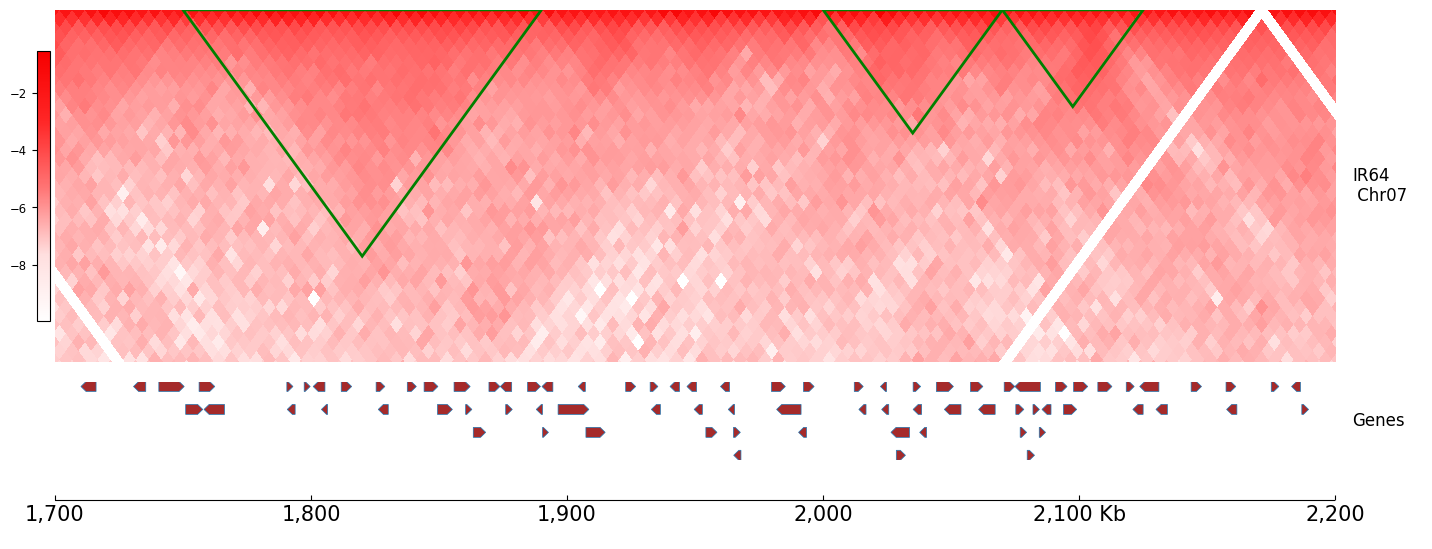

In [76]:
#oruf conserved tad chr07:2070000-2125000, chr07:2280000-2335000
frame = HiCMat(f"/scratch/ak8725/IR64_new/IR64_new.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(ir64_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('IR64\n Chr07') + \
        Spacer(0.5) + \
        BED(ir64_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr07:1700000-2200000")

# Conserved TADs example 5

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


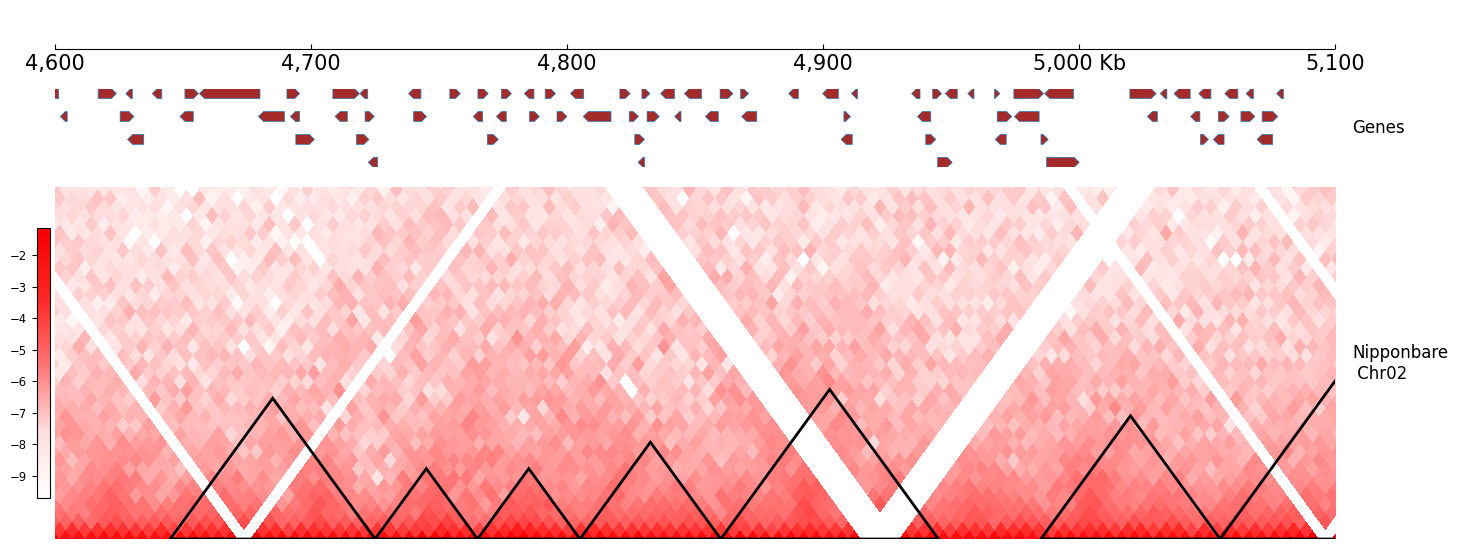

In [124]:
#nipponbare conserved TAD chr02:4645000-4725000 55%, chr02:4860000-4945000 70%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr02')
        
frame.plot("chr02:4600000-5100000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes6.bed.bgz.tbi


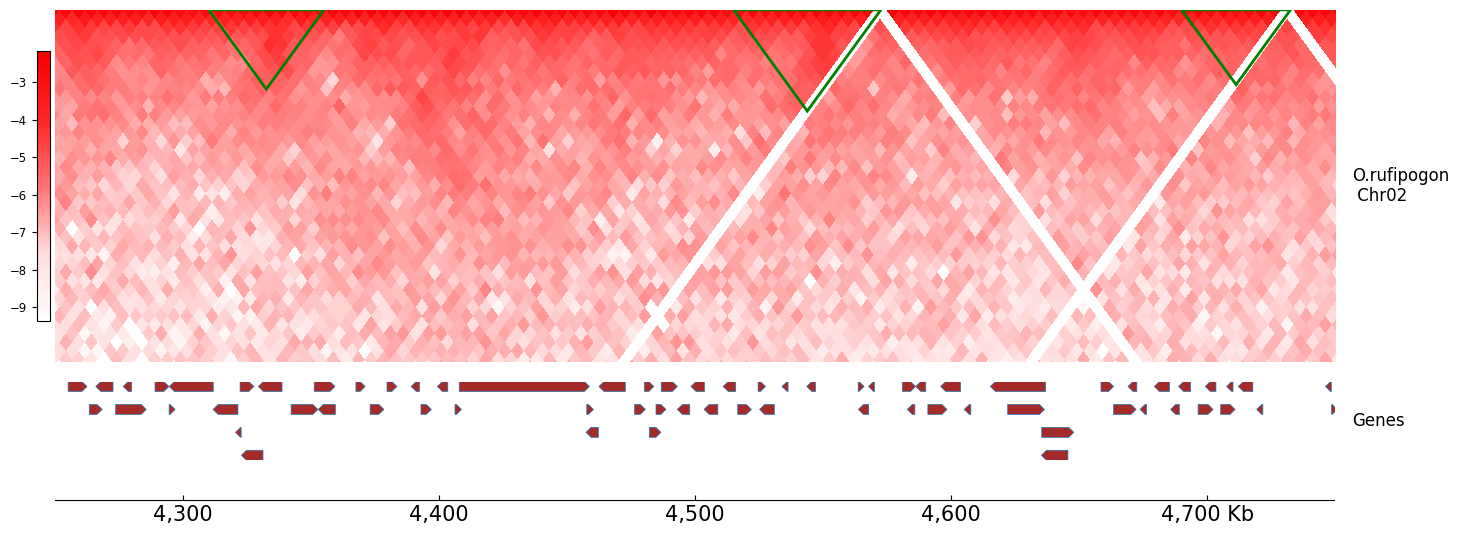

In [125]:
#oruf conserved tad chr02:4310000-4355000, chr02:4515000-4572500
frame = HiCMat(f"/scratch/ak8725/oruf_mrg/ruf_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(oruf_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('O.rufipogon\n Chr02') + \
        Spacer(0.5) + \
        BED(oruf_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr02:4250000-4750000")

# Conserved TADs example 6

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


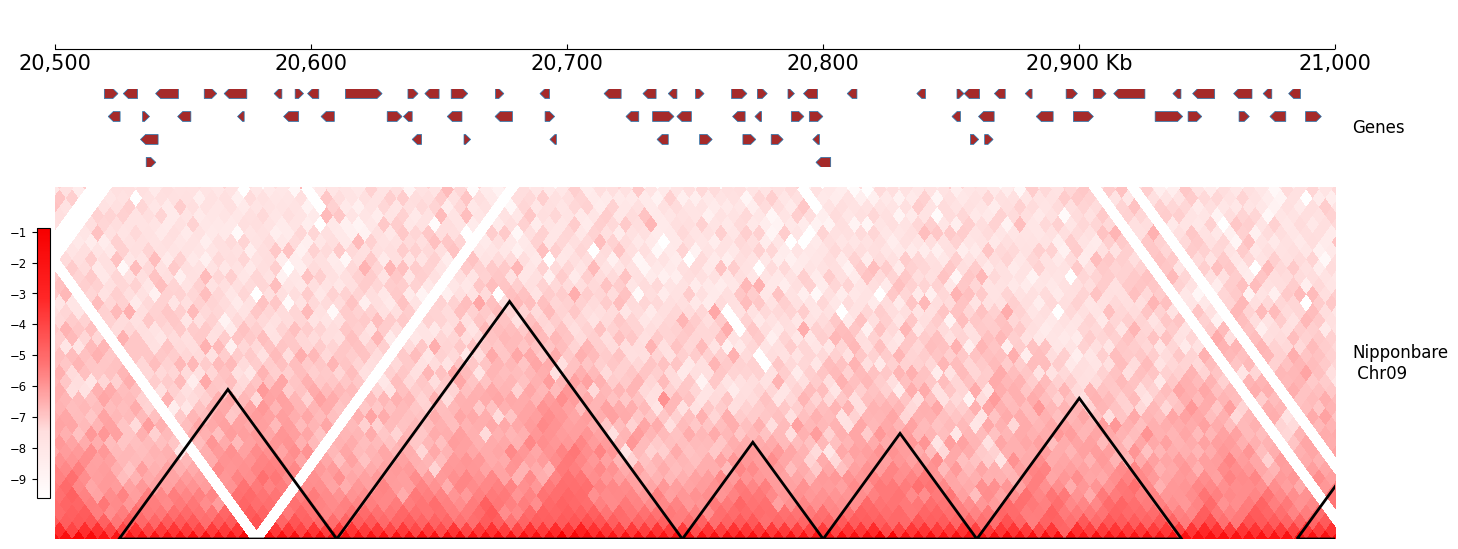

In [145]:
#nipponbare conserved TAD chr09:20610000-20745000 60.8%, chr09:20745000-20800000 94%, chr09:20800000-20860000 95%, chr09:20860000-20940000 110%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr09')
        
frame.plot("chr09:20500000-21000000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/oruf_genes6.bed.bgz.tbi


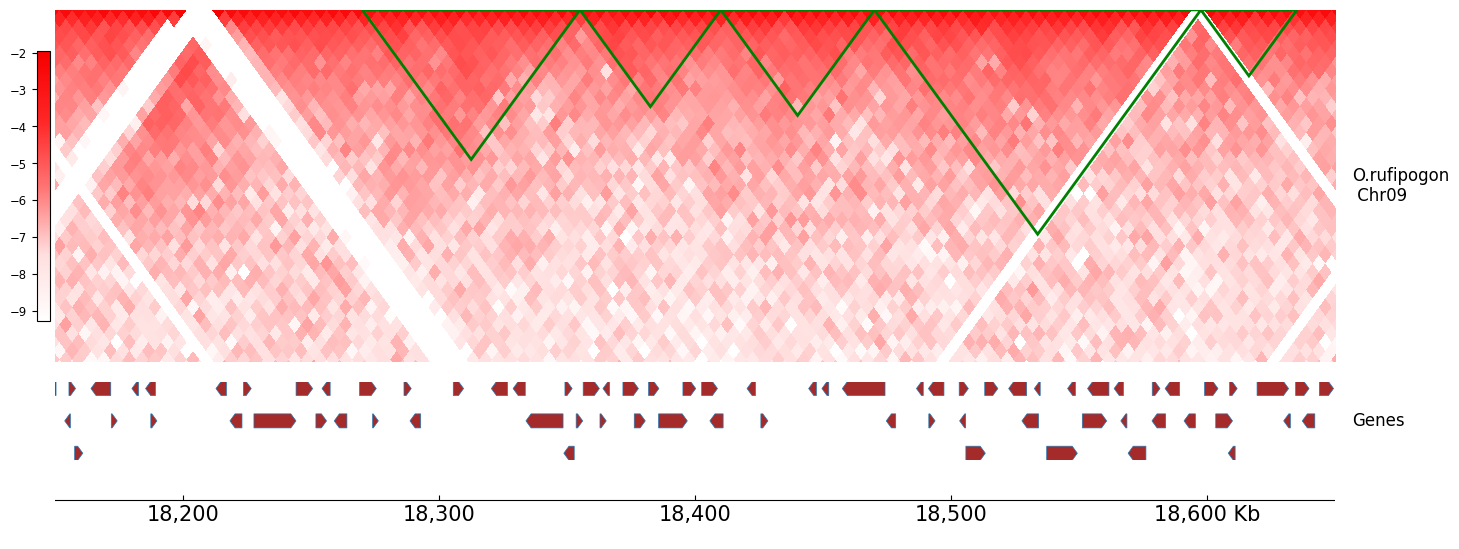

In [148]:
#oruf conserved tad chr09:18270000-18355000, chr09:18355000-18410000, chr09:18410000-18470000, chr09:18470000-18597500
frame = HiCMat(f"/scratch/ak8725/oruf_mrg/ruf_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(oruf_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('O.rufipogon\n Chr09') + \
        Spacer(0.5) + \
        BED(oruf_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr09:18150000-18650000")

# Conserved TADs example 4 Hicexp 5kb TADs

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_new_5kb_hicex_domains.bed.bgz.tbi


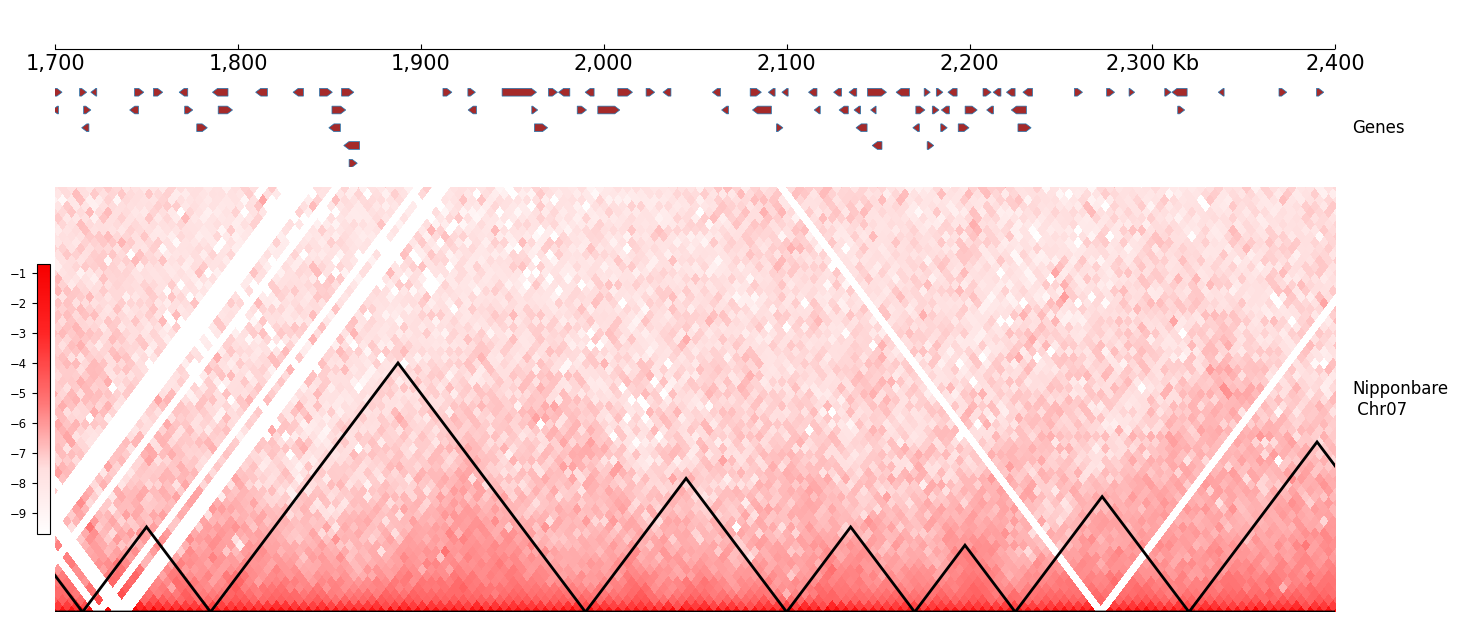

In [90]:
#nipponbare conserved TAD chr03:9495000-9555000 95%
frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.5, resolution=5000) + \
        TADCoverage(hicexp_tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr07')
        
frame.plot("chr07:1700000-2400000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/IR64_new/TADs_boundaries/IR64_new_5kb_hicex_domains.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/ir64_genes6.bed.bgz.tbi


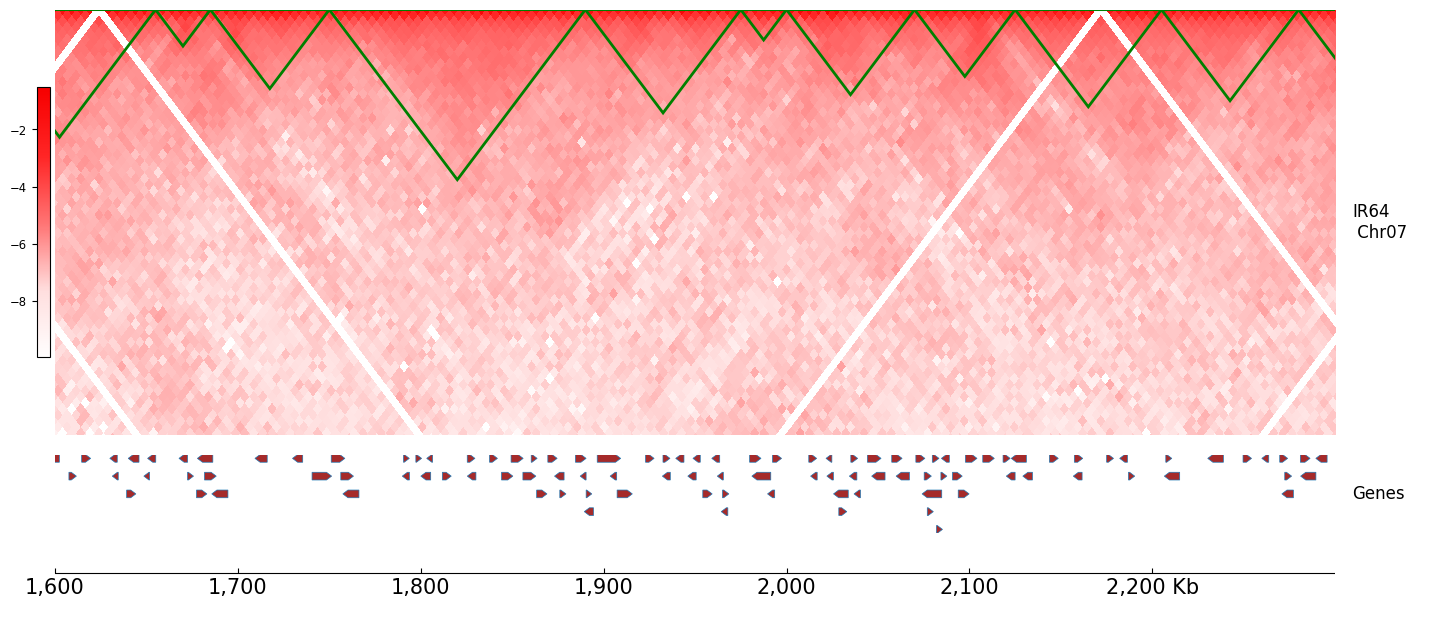

In [91]:
#oruf conserved tad chr03:9165000-9230000
frame = HiCMat(f"/scratch/ak8725/IR64_new/IR64_new.mcool", style='window', orientation='inverted', depth_ratio=0.5, resolution=5000) + \
        TADCoverage(ir64_hicexp_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('IR64\n Chr07') + \
        Spacer(0.5) + \
        BED(ir64_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr07:1600000-2300000")

# Merged TADs example NOT USING IN PAPER

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/npb_genes6.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


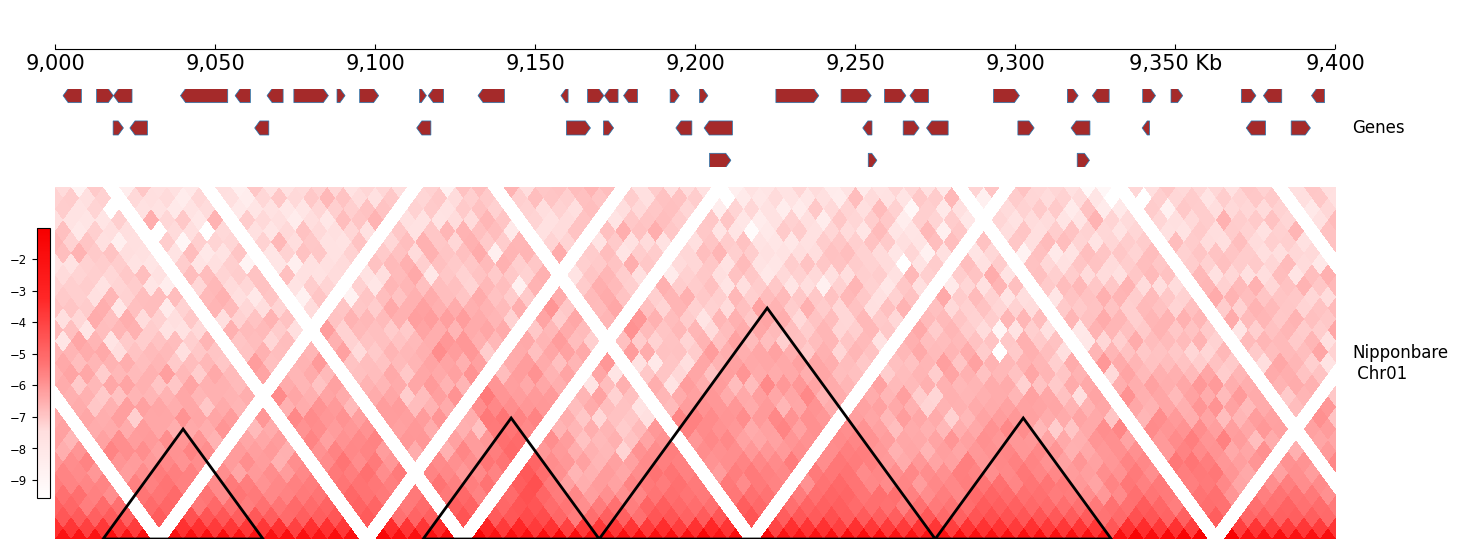

In [361]:
#nipponbare merged TADs chr01:9115000-9170000, chr01:9170000-9275000
tads = '/scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed'
az_tads = '/scratch/ak8725/az_mrg//TADs_boundaries/az_TADs_5kb_two_tools_80.bed'
npb_genes = f"/scratch/ak8725/annotations/npb_genes6.bed"
az_genes = f"/scratch/ak8725/annotations/az_genes6.bed"

frame = XAxis() + \
        BED(npb_genes, labels=False, color = "brown") + Title("Genes") + \
        Spacer(0.5) + \
        HiCMat(f"/scratch/ak8725/NPB_new/NPB_new.mcool", style='window', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + Title('Nipponbare\n Chr01')
        
frame.plot("chr01:9000000-9400000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/az_mrg//TADs_boundaries/az_TADs_5kb_two_tools_80.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/annotations/az_genes6.bed.bgz.tbi


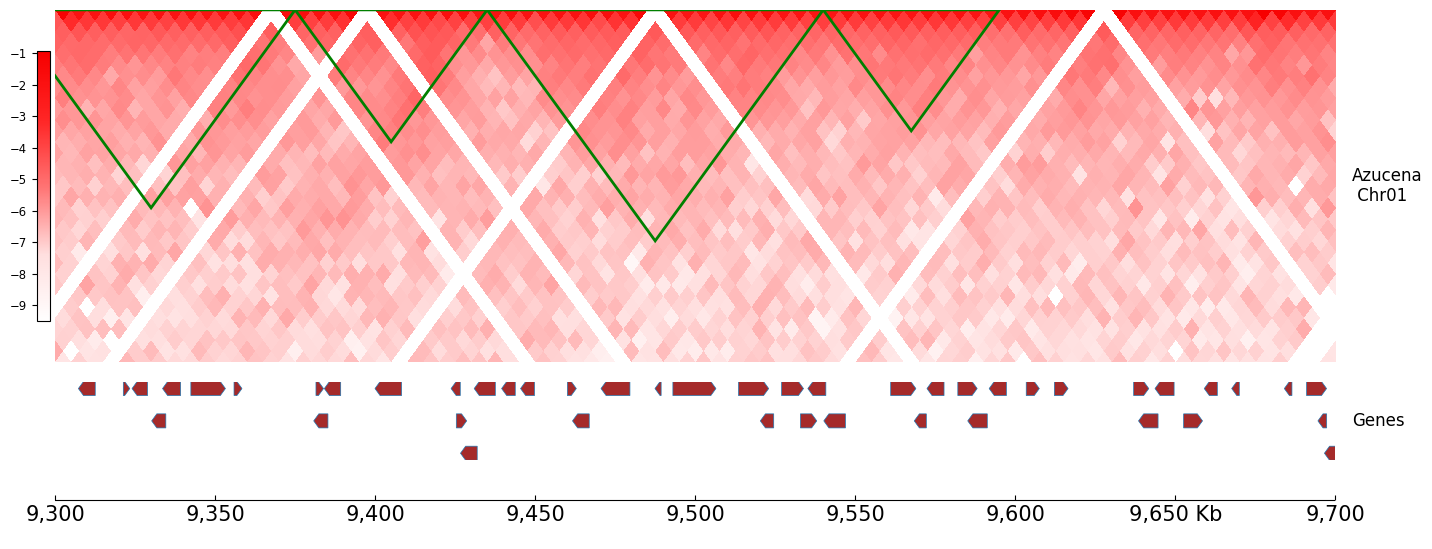

In [370]:
#az tad chr01:9435000-9540000
frame = HiCMat(f"/scratch/ak8725/az_mrg/az_mrg.mcool", style='window', orientation='inverted', depth_ratio=0.4, resolution=5000) + \
        TADCoverage(az_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1) + Title('Azucena\n Chr01') + \
        Spacer(0.5) + \
        BED(az_genes, labels=False, color = "brown") + Title("Genes") + \
        XAxis()
        
frame.plot("chr01:9300000-9700000")

[W::hts_idx_load3] The index file is older than the data file: /scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed.bgz.tbi


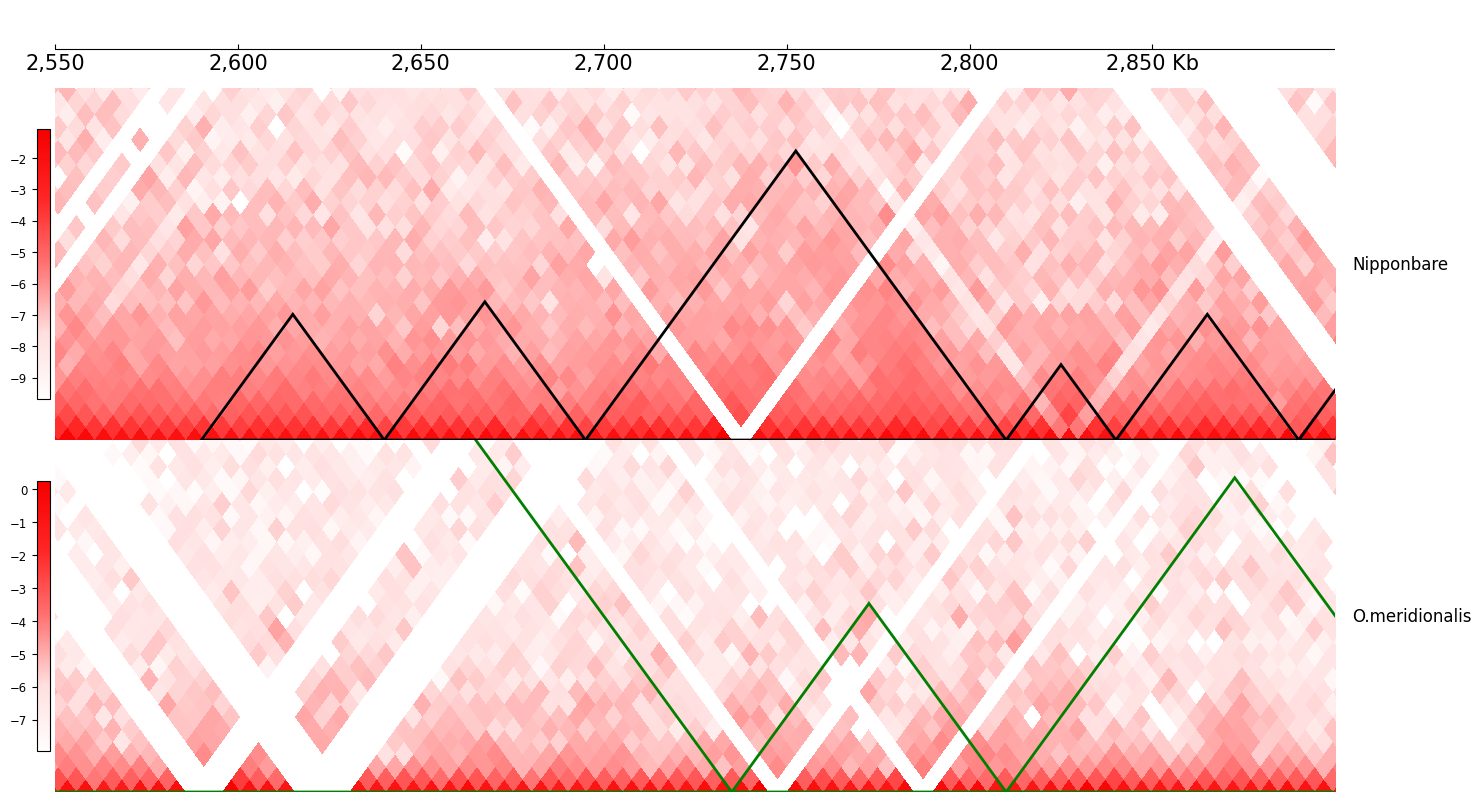

In [83]:
#not using this method because it plots the same region only!
npb = '/scratch/ak8725/NPB_new/NPB_new.mcool'
npb_tads = '/scratch/ak8725/NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed'
omer = '/scratch/ak8725/omer_mrg/omer_mrg.mcool'
omer_tads = '/scratch/ak8725/az_mrg/hitad/az_hitad5kb_0lvl_6.txt'

test_region = "chr01:2550000-2900000"

frame = XAxis() + \
        HiCMat(npb, style='window', depth_ratio=0.4, resolution=5000) +  Title('Nipponbare') + \
        TADCoverage(npb_tads, border_only=True, border_style = 'solid', border_color = 'black', alpha=1) + \
        HiCMat(omer, style='window', depth_ratio=0.4, resolution=5000) +  Title('O.meridionalis') + \
        TADCoverage(omer_tads, border_only=True, border_style = 'solid', border_color = 'green', alpha=1)

frame.plot(test_region)

### Creating BED6 file for plotting genes

In [181]:
with open('/scratch/ak8725/annotations/IR64.gff', 'r') as input_file:
    with open('/scratch/ak8725/annotations/ir64_genes.bed', 'w') as output_file:
        for line in input_file:
            # Skip comment lines
            if line.startswith('#'):
                continue
            
            # Split the line into columns
            columns = line.split('\t')
            
            # Check if the third column contains the word 'gene'
            if 'gene' in columns[2]:
                # Extract relevant information and write to the output file
                output_file.write('\t'.join([columns[0], columns[3], columns[4], columns[8].split(';')[0].split('=')[1], '1', columns[6]]) + '\n')

In [185]:
with open('/scratch/ak8725/annotations/ir64_genes.bed', 'r') as input_file:
    with open('/scratch/ak8725/annotations/ir64_genes6.bed', 'w') as output_file:
        for line in input_file:
            # Split the line into columns
            columns = line.strip().split('\t')  # Strip newline character

            # Remove 'gene:' from col4
            gene_id = columns[3].replace('gene:', '')
            
            # Write the modified information to the output file
            output_file.write('\t'.join([columns[0], columns[1], columns[2], gene_id, columns[4], columns[5]]) + '\n')


In [191]:
input_file_path = '/scratch/ak8725/annotations/ir64_genes6.bed'

# Read the contents of the file into a list
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Modify the lines in-place
for i in range(len(lines)):
    # Split the line into columns
    columns = lines[i].split('\t')
    
    # Replace 'C' with 'c' in col1
    columns[0] = columns[0].replace('C', 'c')
    
    # Join the columns back into a line
    lines[i] = '\t'.join(columns)

# Write the modified lines back to the file
with open(input_file_path, 'w') as file:
    file.writelines(lines)

In [195]:
input_file_path = '/scratch/ak8725/annotations/ir64_genes6.bed'

# Read the contents of the file into a list
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Sort the lines based on col1, col2, col3
lines.sort(key=lambda line: tuple(map(str, line.strip().split('\t')[:3])))

# Write the sorted lines back to the file
with open(input_file_path, 'w') as file:
    file.writelines(lines)